# **STROKE PREDICTION DATASET**

# **Importing Required Libraries for Execution**

In [51]:
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,mean_absolute_error,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# **Loading the dataset**

In [52]:
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **Analysis Of data**

In [53]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [54]:
df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [55]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

# **Analysis data through visuals**

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

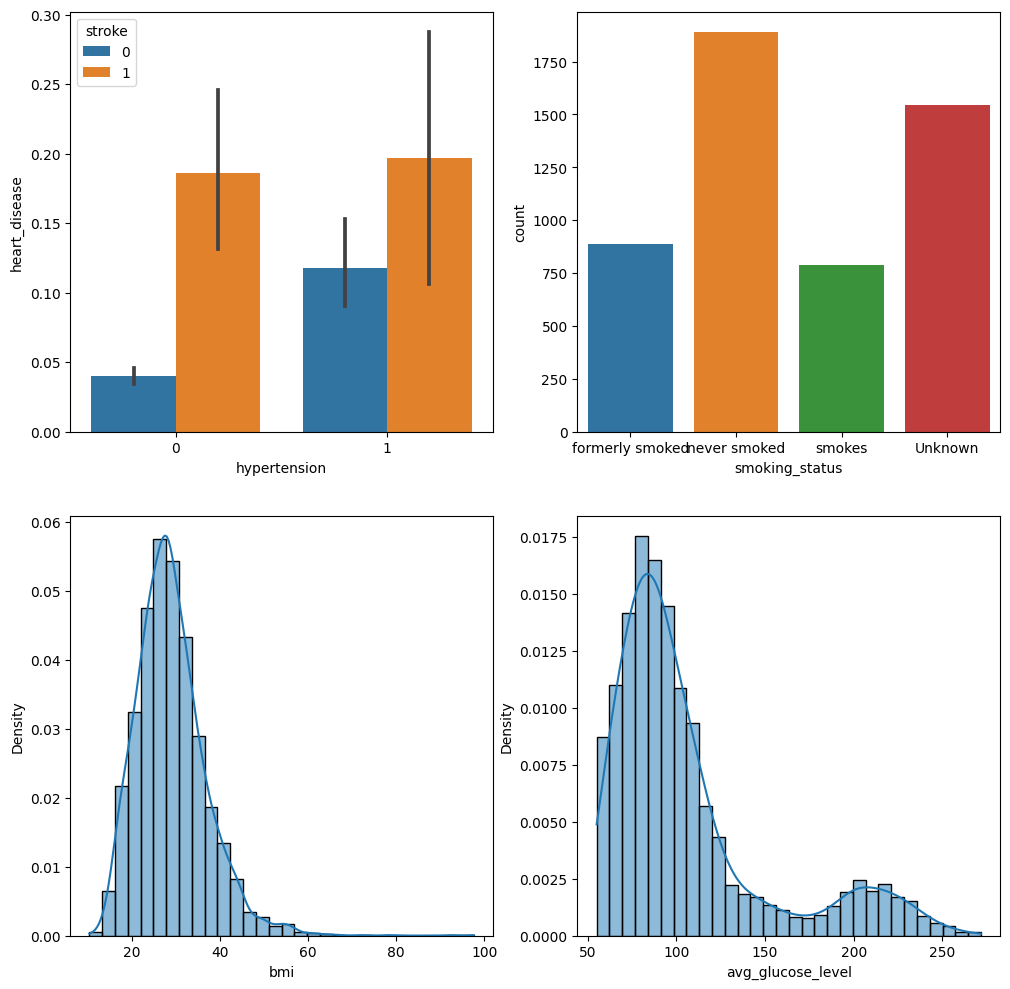

In [56]:
fig,axis=plt.subplots(2,2,figsize=(12,12))
sns.barplot(df,x='hypertension',y='heart_disease',hue='stroke',ax=axis[0,0])
sns.countplot(df,x='smoking_status',ax=axis[0,1])
sns.histplot(x="bmi",data=df,bins=30,kde=True,stat="density",linewidth=1,ax=axis[1,0])
sns.histplot(x="avg_glucose_level",data=df,bins=30,kde=True,stat="density",linewidth=1,ax=axis[1,1])

# **Data Cleaning and Data Processing**

In [57]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [58]:
df['bmi']=df['bmi'].fillna(df['bmi'].mode()[0])

In [59]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [60]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [61]:
le=LabelEncoder()
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [62]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

# **Checking the dataset is Balance or Not**

0    4861
1     249
Name: stroke, dtype: int64


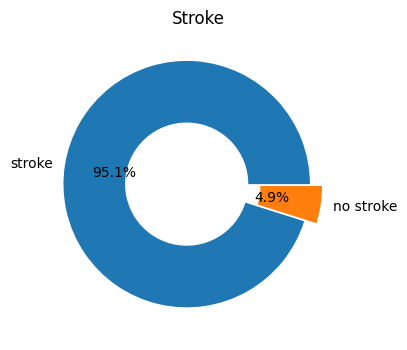

In [63]:
h=df['stroke'].value_counts()
print(h)
new=['stroke','no stroke']
plt.figure(figsize=(4,4))
plt.pie(h,explode=[0.1,0],labels=new,autopct='%2.1f%%',wedgeprops={'width':0.5})
plt.title('Stroke')
plt.show()

**Droping the unwanted Features**

In [64]:
df.drop(labels=['id','age','gender','ever_married','work_type','Residence_type'],axis=1,inplace=True)

# **Seperating dataset input as X and output as Y**

In [65]:
X=df.iloc[:,:-1]
X

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,0,1,228.69,36.6,1
1,0,0,202.21,28.7,2
2,0,1,105.92,32.5,2
3,0,0,171.23,34.4,3
4,1,0,174.12,24.0,2
...,...,...,...,...,...
5105,1,0,83.75,28.7,2
5106,0,0,125.20,40.0,2
5107,0,0,82.99,30.6,2
5108,0,0,166.29,25.6,1


In [66]:
Y=df.iloc[:,-1]
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# **Scaling the Features**

In [67]:
sc=StandardScaler()
X_new=sc.fit_transform(X)
X_new

array([[-0.32860186,  4.18503199,  2.70637544,  1.00220956, -0.35178071],
       [-0.32860186, -0.2389468 ,  2.12155854, -0.02411685,  0.58155233],
       [-0.32860186,  4.18503199, -0.0050283 ,  0.46955914,  0.58155233],
       ...,
       [-0.32860186, -0.2389468 , -0.51144264,  0.22272115,  0.58155233],
       [-0.32860186, -0.2389468 ,  1.32825706, -0.42685253, -0.35178071],
       [-0.32860186, -0.2389468 , -0.46086746, -0.34890369, -1.28511375]])

# **ImBalanced dataset handling using SMOTEENN**

In [68]:
from imblearn.combine import SMOTEENN
os=SMOTEENN()
X_os,Y_os=os.fit_resample(X_new,Y)
X_os,Y_os

(array([[-0.32860186, -0.2389468 , -0.24354879, -1.41420453, -1.28511375],
        [ 3.04319637, -0.2389468 , -0.40167904,  1.33998787,  0.58155233],
        [-0.32860186, -0.2389468 ,  0.10473529, -1.46617042, -1.28511375],
        ...,
        [-0.32860186,  4.18503199,  2.30802634, -0.02411685, -1.28511375],
        [ 3.04319637,  4.18503199,  3.14811157, -0.10370018,  1.39746043],
        [-0.32860186, -0.2389468 , -0.35688151, -0.01954063, -1.28511375]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6456    1
 6457    1
 6458    1
 6459    1
 6460    1
 Name: stroke, Length: 6461, dtype: int64)

1    3356
0    3105
Name: stroke, dtype: int64


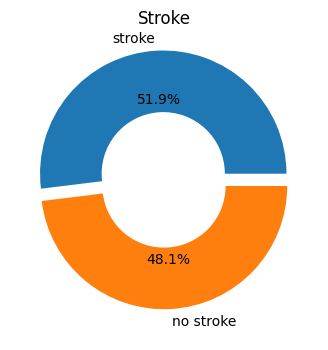

In [69]:
h1=Y_os.value_counts()
print(h1)
new=['stroke','no stroke']
plt.figure(figsize=(4,4))
plt.pie(h1,explode=[0.1,0],labels=new,autopct='%2.1f%%',wedgeprops={'width':0.5})
plt.title('Stroke')
plt.show()

**Splitting the dataset into training and test sets**

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X_os,Y_os,test_size=0.3,random_state=1)

# **Model Creation**



*   **KNN**
*   **SVM**

*   **Naive Bayes**
*   **Random Forest**

*   **DecisionTree**


In [71]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC(kernel='linear')
nb=GaussianNB()
rfc=RandomForestClassifier(n_estimators=15,criterion='entropy')
dt=DecisionTreeClassifier(criterion='entropy')
lst=[knn,svm,nb,rfc,dt]
score=[]
for model in lst:
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print('Accuracy_score of',model,':')
  model_score=accuracy_score(Y_test,Y_pred)*100
  print(model_score) 
  score.append(model_score)
  print('****************************************')

Accuracy_score of KNeighborsClassifier() :
95.9257349149046
****************************************
Accuracy_score of SVC(kernel='linear') :
76.37957710159876
****************************************
Accuracy_score of GaussianNB() :
73.4914904589995
****************************************
Accuracy_score of RandomForestClassifier(criterion='entropy', n_estimators=15) :
97.06034038164002
****************************************
Accuracy_score of DecisionTreeClassifier(criterion='entropy') :
95.66787003610109
****************************************


# **Creation of Stacking model**

98.29809179989685
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       925
           1       0.98      0.99      0.98      1014

    accuracy                           0.98      1939
   macro avg       0.98      0.98      0.98      1939
weighted avg       0.98      0.98      0.98      1939



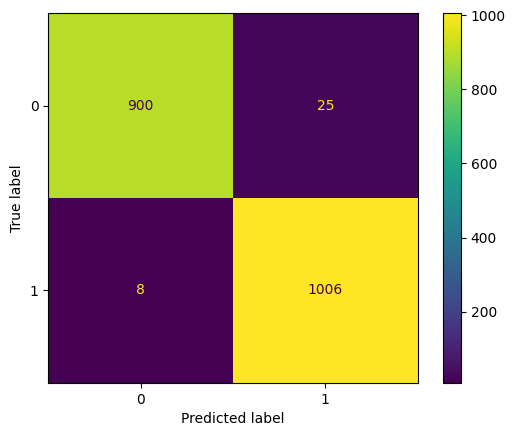

In [72]:
clf=[('knn',knn),('svm',svm),('nb',nb),('rfc',rfc),('dt',dt)]
lr=LogisticRegression(random_state=56)
sc=StackingClassifier(estimators=clf,final_estimator=lr,cv=5)
sc.fit(X_train,Y_train)
Y_pred1=sc.predict(X_test)
Y_pred1
sc_score=accuracy_score(Y_test,Y_pred1)*100
print(sc_score)
score.append(sc_score)
print(classification_report(Y_test,Y_pred1))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred1))

# **Comparing Accuracy**

In [73]:
Algorithm=['knn','svm','Naive','Random Forest','Decision Tree','Stacking']
Accuracy=score
Data=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6])
Data.style\
.highlight_max(subset='Accuracy',color='lightgreen')\
.highlight_min(subset='Accuracy',color='red')

,Algorithm,Accuracy
1,knn,95.925735
2,svm,76.379577
3,Naive,73.491490
4,Random Forest,97.060340
5,Decision Tree,95.667870
6,Stacking,98.298092


**So,Here we develop a Stroke prediction model using Stacking model.Thus, after balancing the data, the stacking model yields a high accuracy of 98.29809.**